<a href="https://colab.research.google.com/github/SayantikaFSU/LeetCodes/blob/main/Miscelleneous_problems1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook deals with 3 interesting problems I encountered in a technical interview. The problems are arranged in increasing order of difficulty.
********************************************************************************
***************************************************************************************


problem 5:
*************************************
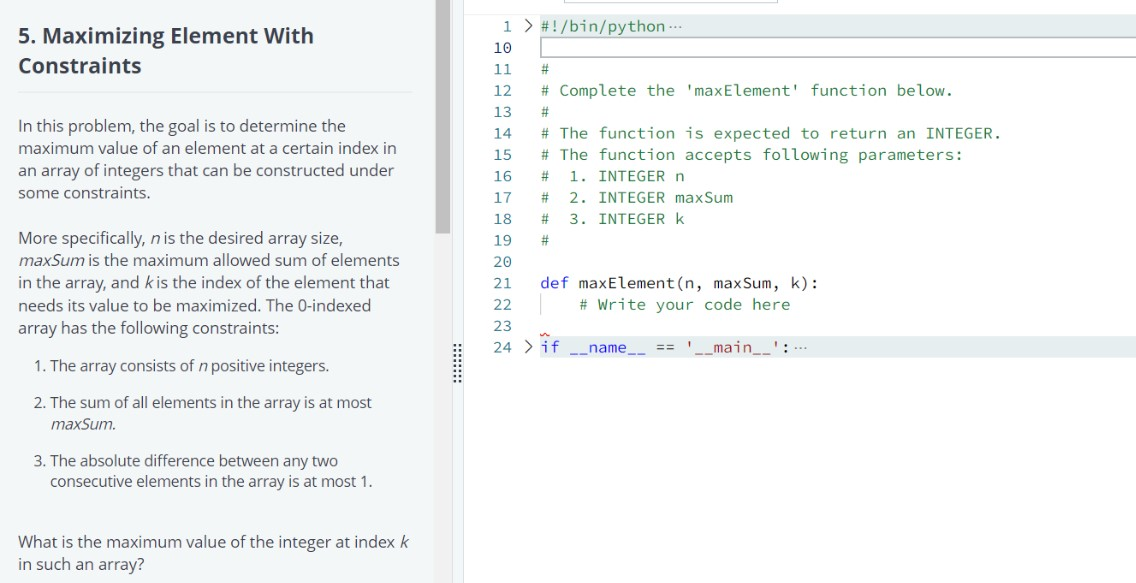

In [ ]:
import numpy as np
import math

def maxElement(n, maxSum, k):
    #create the integers
    a=np.zeros(n)
    element=np.zeros(n)
    #print(a)
    for i in range(n):
        a[i]=i
    deno=int(np.sum(a))
    #print(denominator)
    value= (maxSum-deno)/n
    print(value)
    if value == int(value):
      value=int(value)
    else:
      value=math.ceil(value)
    print('first element',value)

    checkSum=[]
    for i in range(n):
      cand=value+i
      checkSum.append(cand)
      print('checkSum',checkSum)
      if sum(checkSum)<=maxSum:
        element[i]=cand
      else:
        element[i]=maxSum- sum(checkSum[0:i])


    print(element)
    return element[k]


if __name__ == '__main__':
    #result=maxElement(3, 7, 1)
    #print(result)
    #result=maxElement(4,6,2)
    #print(result)
    result=maxElement(4,4,3)
    print(result)

-0.5
first element 0
checkSum [0]
checkSum [0, 1]
checkSum [0, 1, 2]
checkSum [0, 1, 2, 3]
[0. 1. 2. 1.]
1.0


problem 4:
*************************
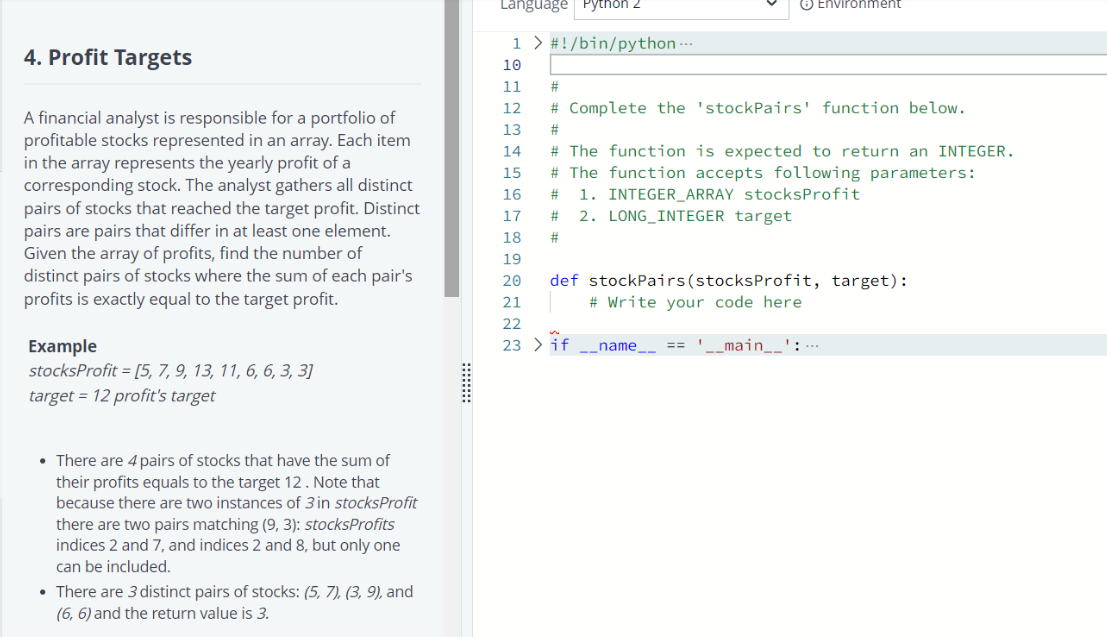

In [ ]:
# Complete the 'stockPairs' function below.
#
# The function is expected to return an INTEGER.
# The function accepts following parameters:
#  1. INTEGER_ARRAY stocksProfit
#  2. LONG_INTEGER target
#

def stockPairs(stocksProfit, target):
    n=len(stocksProfit)
    print('Len=',n)
    list1=[]
    for i in range(n):
        for j in range(i+1,n):
            if stocksProfit[i]+stocksProfit[j]==target:
                print(i,j)
                list1.append(sorted([stocksProfit[i],stocksProfit[j]]))
    print(list1)
    unique_pairs= set(tuple(sorted(pair)) for pair in list1)
    list2=list(unique_pairs)
    print(list2)
    return len(list2)

if __name__ == '__main__':
    k=stockPairs([5,7,9,13,11,6,6,3,3],12)
    print(k)

Len= 9
0 1
2 7
2 8
5 6
[[5, 7], [3, 9], [3, 9], [6, 6]]
[(6, 6), (3, 9), (5, 7)]
3


Problem 3: Hashing Function
**************************
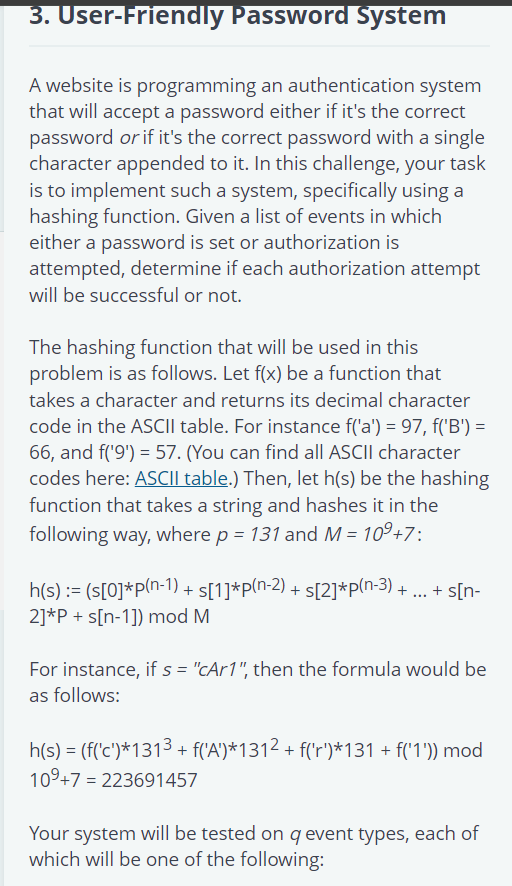

In [ ]:
# initializing objects
int_val = 4
str_val = 'GeeksforGeeks'
flt_val = 24.56

# Printing the hash values.
# Notice Integer value doesn't change
# You'll have answer later in article.
print("The integer hash value is : " + str(hash(int_val)))
print("The string hash value is : " + str(hash(str_val)))
print("The float hash value is : " + str(hash(flt_val)))




# initializing objects
# tuple are immutable
tuple_val = (1, 2, 3, 4, 5)

# list are mutable
list_val = [1, 2, 3, 4, 5]

# Printing the hash values.
# Notice exception when trying
# to convert mutable object
print("The tuple hash value is : " + str(hash(tuple_val)))
print("The list hash value is : " + str(hash(tuple(list_val))))


The integer hash value is : 4
The string hash value is : 3969460866310242259
The float hash value is : 1291272085159665688
The tuple hash value is : -5659871693760987716
The list hash value is : -5659871693760987716


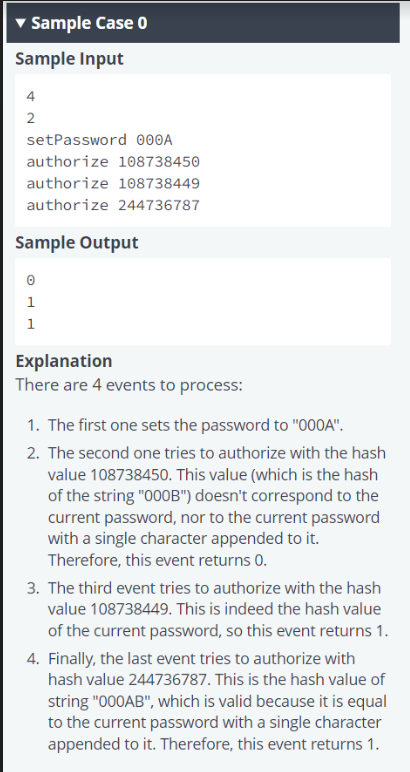

In [ ]:
# Complete the 'authEvents' function below.
#
# The function is expected to return an INTEGER_ARRAY.
# The function accepts 2D_STRING_ARRAY events as parameter.



def f(x):
    # Function to return ASCII value of character x
    return ord(x)

def h(s):
    # Hash function to calculate the hash of the string s
    p = 131
    M = 10**9 + 7
    n = len(s)
    hash_value = 0

    for i in range(n):
        k = n - i - 1
        hash_value = (hash_value + f(s[i]) * (p ** k)) % M

    return hash_value

def authEvents(events):
    current_password = "" ## initialize with empty
    results = []

    for event in events:
        if event[0] == "setPassword":
            current_password = event[1]
            #print('current_password',current_password)

        elif event[0] == "authorize":
            x = int(event[1])
            #print('x',x)
            # Check if x matches the hash of the current password
            if x == h(current_password):
                #print('h(s)',h(current_password))
                results.append(1)
            else:
                # Check if x matches the hash of current_password with one extra character appended
                found = False
                for c in range(32, 127):  # ASCII range for printable characters
                    if x == h(current_password + chr(c)):
                        #print('h(s)',h(current_password + chr(c)))
                        results.append(1)
                        found = True
                        break
                if not found:
                    results.append(0)


    return results


if __name__ == '__main__':
    events1 = [
        ["setPassword", "000AB"],
        ["authorize", "223691457"],
        ["authorize", "303580761"],
       ["authorize", "100"]

    ]

    events= [
        ["setPassword", "000A"],
        ["authorize", "108738450"],
        ["authorize", "108738449"],
        ["authorize", "244736787"]
    ]
    print(authEvents(events1))
    print(authEvents(events))


[0, 0, 0]
[0, 1, 1]


Problem 4:
Find the minimum number of extra cards needed to produce n equal stacks of cards, where each stack has m different types of cards in it.
********************************

In [35]:
import numpy as np

def find_next_even(number):
    if number%2==0:
        value=number
    else:
        number=number+1
        value= find_next_even(number)
    return value

#print(find_next_even(11))

def minimum_to_arr(arr):
    v=[]
    for i in range(0, len(arr)):
      value= find_next_even(arr[i])
      temp=abs(value-arr[i])
      v.append(temp)
    return v

#v= minimum_to_arr([0,1,3,5,6])
#print(v)

# if we want to make 3 instances of an array with len=original length and equal position value, how much should we add to each value.
def add_extra(arr,inst):
    v1=minimum_to_arr(arr)
    n=len(arr)
    # for 2 equal instances each array value should be:
    v0=[] ; v_inst=[]
    for i in range(0,n):
       temp1 = (arr[i]+v1[i])
       temp2= (temp1/2)*inst
       v0.append(int(temp1))
       v_inst.append(int(temp2))
    return v0,v_inst

arr=np.array([0,1,3,5,6]); m=3
v0,v_inst=add_extra(arr,3)
extra = np.sum(v_inst-arr)
print('Originial',arr)
print('for 2 equal instance total',v0, 'each =', list((np.array(v0)/2)))
print('for %d equal instance'%(m),v_inst, 'each =', list((np.array(v_inst)/m)), 'extra cards needed=',extra)



Originial [0 1 3 5 6]
for 2 equal instance total [0, 2, 4, 6, 6] each = [0.0, 1.0, 2.0, 3.0, 3.0]
for 3 equal instance [0, 3, 6, 9, 9] each = [0.0, 1.0, 2.0, 3.0, 3.0] extra cards needed= 12


Problem 5:
Find all possible sub array of an array.
***********************************

In [65]:
import numpy as np

def all_subarray(arr:list)->dict:
   hash_table={}
   n=len(arr)

   for i in range(0,n):
      s=arr[i]
      hash_table[s]=[[s]]
      for j in range(i+2,n+1):
         print(i,j)
         subarr=arr[i:j]
         key=s
         if len(subarr)>0:

            if key not in hash_table:
                  hash_table[key]=subarr
            else:
                  hash_table[key].append(subarr)


   return hash_table
arr=[1,2,3]
print(all_subarray(arr))


0 2
0 3
1 3
{1: [[1], [1, 2], [1, 2, 3]], 2: [[2], [2, 3]], 3: [[3]]}


In [54]:
arr=[0,1,2,3,4]
arr[0:2]

[0, 1]

given a limit value = L

if min(array) <= L / len(array)-----> invalid : else --> valid

Find number of valid subarrays

In [69]:
L=6
def find_valid_subarray(arr,L):
    hash_table=all_subarray(arr)
    #print(hash_table)
    r1=0
    r2=0
    for keys, values in hash_table.items():
       #print(keys,values)
       l1=values
       n=len(l1)
       for i in range(0,n):
           s= np.sum(l1[i])
           m=len(l1[i])
           v=L/m
           if s<=v:
               print('valid')
               r1+=1
           else:
               print('invalid')
               r2+=1
    return r1,r2




arr=[1,2,3]
print(find_valid_subarray(arr,L))
#

0 2
0 3
1 3
valid
valid
invalid
valid
invalid
valid
(4, 2)
